In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

Task 1

In [2]:
#прочитали данные, предобработали
df = pd.read_csv('CC GENERAL.csv')
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [3]:
#Гипотеза: кластеризуем пользователей по балансу, сумме и частоте покупок, покупкам в рассрочку, как часто совершаются покупки в рассрочку, сумма платежа. Остальное выкинем

df = df.drop(['CUST_ID', 'BALANCE_FREQUENCY', 'ONEOFF_PURCHASES', 'CASH_ADVANCE', 'ONEOFF_PURCHASES_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'], axis=1)
df

,BALANCE,PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,PAYMENTS
0,40.900749,95.40,95.40,0.166667,0.083333,201.802084
1,3202.467416,0.00,0.00,0.000000,0.000000,4103.032597
2,2495.148862,773.17,0.00,1.000000,0.000000,622.066742
3,1666.670542,1499.00,0.00,0.083333,0.000000,0.000000
4,817.714335,16.00,0.00,0.083333,0.000000,678.334763
...,...,...,...,...,...,...
8945,28.493517,291.12,291.12,1.000000,0.833333,325.594462
8946,19.183215,300.00,300.00,1.000000,0.833333,275.861322
8947,23.398673,144.40,144.40,0.833333,0.666667,81.270775
8948,13.457564,0.00,0.00,0.000000,0.000000,52.549959


/home/lad1chka/miniconda3/envs/my-environment/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/lad1chka/miniconda3/envs/my-environment/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/lad1chka/miniconda3/envs/my-environment/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/lad1chka/miniconda3/envs/my-environment/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set th

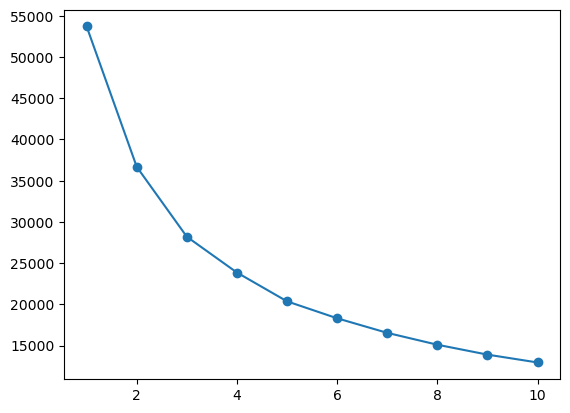

In [4]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
arr = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    arr.append(kmeans.inertia_)

plt.plot(range(1, 11), arr, marker='o')
plt.show()

/home/lad1chka/miniconda3/envs/my-environment/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


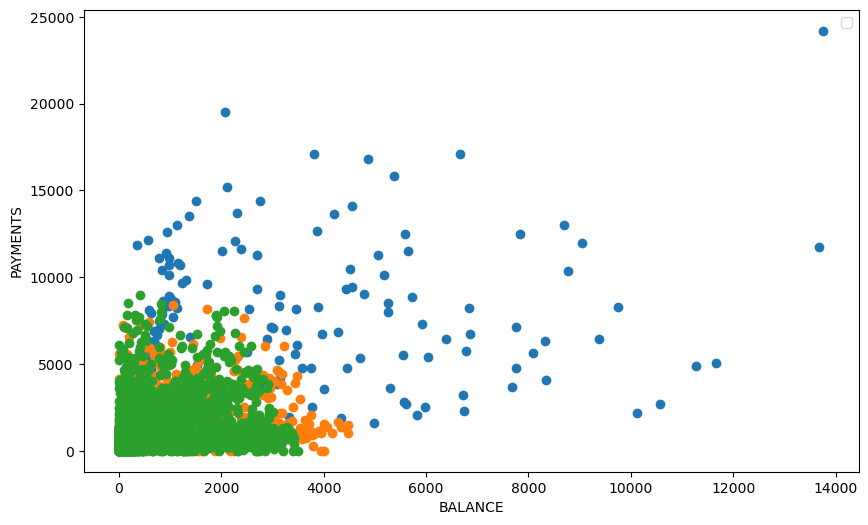

In [5]:
#Наименьший угол в n=3, поэтому выберем именно 3
clusters = 3
model = KMeans(n_clusters=clusters, random_state=42)
model.fit(scaled_data)

df['cluster'] = kmeans.labels_

plt.figure(figsize=(10, 6))
for cluster in range(clusters):
    plt.scatter(df[df['cluster'] == cluster]['BALANCE'], 
                df[df['cluster'] == cluster]['PAYMENTS'])
plt.xlabel('BALANCE')
plt.ylabel('PAYMENTS')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


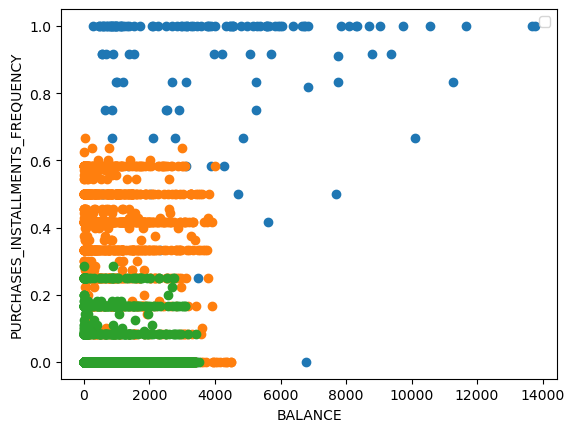

In [6]:
for cluster in range(clusters):
    plt.scatter(df[df['cluster'] == cluster]['BALANCE'], 
                df[df['cluster'] == cluster]['PURCHASES_INSTALLMENTS_FREQUENCY'])
plt.xlabel('BALANCE')
plt.ylabel('PURCHASES_INSTALLMENTS_FREQUENCY')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


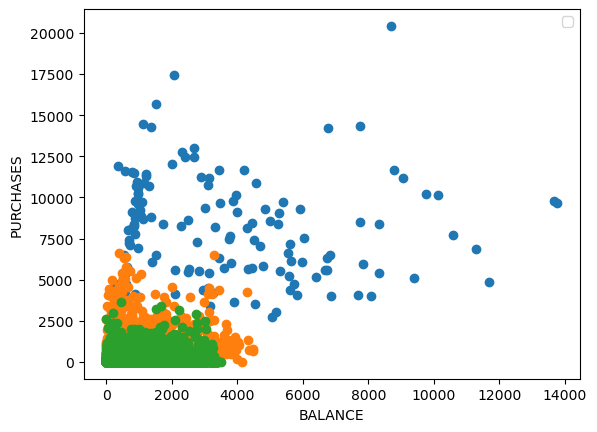

In [7]:
for cluster in range(clusters):
    plt.scatter(df[df['cluster'] == cluster]['BALANCE'], 
                df[df['cluster'] == cluster]['PURCHASES'])
plt.xlabel('BALANCE')
plt.ylabel('PURCHASES')
plt.legend()
plt.show()

Тяжело разделить наше множество на 3 группы, тем не менее оранжевые - часто покупает с рассрочку, имеют баланс не выше среднего, зеленые - редко покупают в рассрочку, имеют баланс не выше среднего, синие, по большей части, имеют баланс чуть выше, чем у зеленых и оранжевых, также чаще совершают покупки и чаще покупают в рассрочку

Task 2

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


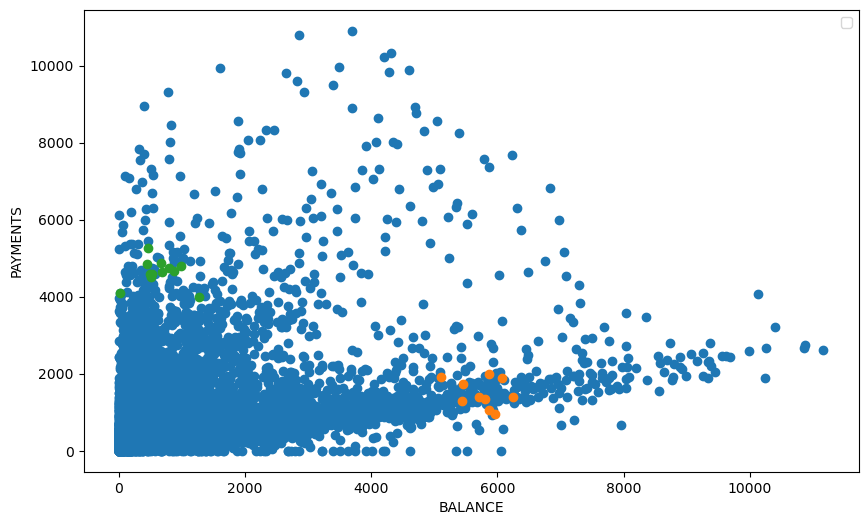

In [8]:
#Сделаем всё тоже самое, только для модели dbscan и сравним результаты
from sklearn.cluster import DBSCAN

clusters = 3
model2 = DBSCAN(eps=0.5, min_samples=10)
clusters_dbscan = model2.fit_predict(scaled_data)
df['cluster_DBSCAN'] = clusters_dbscan

plt.figure(figsize=(10, 6))
for cluster in range(clusters):
    plt.scatter(df[df['cluster_DBSCAN'] == cluster]['BALANCE'], 
                df[df['cluster_DBSCAN'] == cluster]['PAYMENTS'])
plt.xlabel('BALANCE')
plt.ylabel('PAYMENTS')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


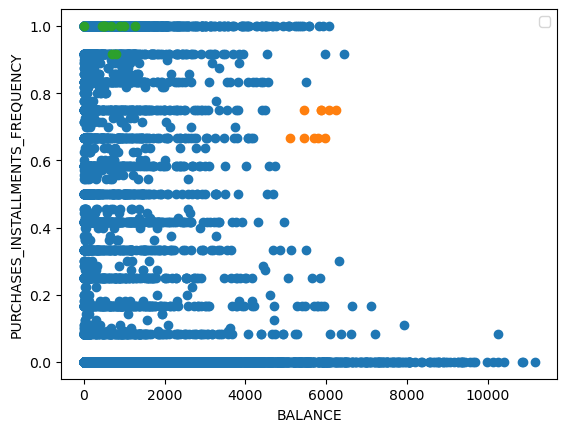

In [9]:
for cluster in range(clusters):
    plt.scatter(df[df['cluster_DBSCAN'] == cluster]['BALANCE'], 
                df[df['cluster_DBSCAN'] == cluster]['PURCHASES_INSTALLMENTS_FREQUENCY'])
plt.xlabel('BALANCE')
plt.ylabel('PURCHASES_INSTALLMENTS_FREQUENCY')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


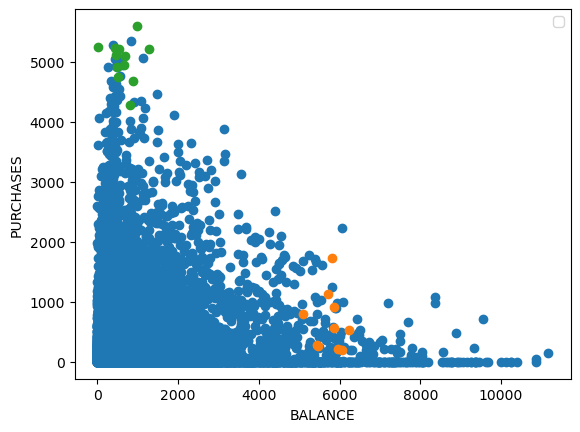

In [10]:
for cluster in range(clusters):
    plt.scatter(df[df['cluster_DBSCAN'] == cluster]['BALANCE'], 
                df[df['cluster_DBSCAN'] == cluster]['PURCHASES'])
plt.xlabel('BALANCE')
plt.ylabel('PURCHASES')
plt.legend()
plt.show()

In [11]:
#Очевидный вывод: dbscan намного хуже кластеризовал группы